In [2]:
import yt
print(yt.__version__) # 3.6.0 or higher
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moment

3.6.0


## Plot a single image

In [26]:
datfile = '~/uni/astro/archive/output2_A800/turbulence_0050.dat'
ds = yt.load(datfile)
ad = ds.all_data()
print(ds.field_list)

yt : [INFO     ] 2020-12-03 14:28:32,427 Parameters: current_time              = 37.5
yt : [INFO     ] 2020-12-03 14:28:32,428 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-03 14:28:32,428 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-03 14:28:32,429 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-03 14:28:32,430 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-03 14:28:32,821 e not found and no parfile passed, can not set thermal_pressure.


[('amrvac', 'curlV'), ('amrvac', 'm1'), ('amrvac', 'm2'), ('amrvac', 'rho')]


yt : [INFO     ] 2020-12-03 14:32:03,189 xlim = 0.000000 35.000000
yt : [INFO     ] 2020-12-03 14:32:03,189 ylim = 0.000000 30.000000
yt : [INFO     ] 2020-12-03 14:32:03,190 xlim = 0.000000 35.000000
yt : [INFO     ] 2020-12-03 14:32:03,191 ylim = 0.000000 30.000000
yt : [INFO     ] 2020-12-03 14:32:03,191 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_axes_unit_names', '_background_color', '_callbacks', '_cbar_minorticks', '_colorbar_label', '_colorbar_valid', '_colormaps', '_current_field', '_data_valid', '_equivalencies', '_field_transform', '_font_color', '_font_properties', '_frb', '_frb_generator', '_get_axes_labels', '_get_axes_unit_labels', '_initialize_dataset', '_minorticks', '_periodic', '_plot_type', '_plot_valid', '_projection', '_recreate_frb', '_repr_html_', '_right_handed', '_set_font_properties', '_set_window', '_setup_origin', '_setup_plots', '_splat_color', '_switch_ds', '_transform', '_xlabel', '_ylabel', 'annotate_arrow', 'annotate_cell_edges', '


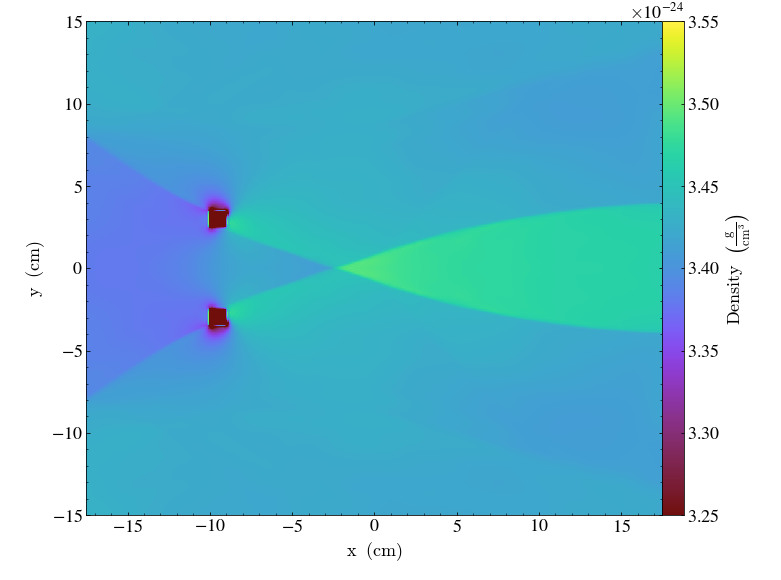

In [31]:
dat = 'density'

p = yt.plot_2d(ds, dat)
p.set_log(dat, False)
p.set_zlim(dat, 3.25e-24, 3.55e-24)
print(dir(p))
p.show()

## Plot the average velocity

### Axis 0

In [ ]:

data = 'm1'
U_in = 5
total = {}

names = ('J','F','H')

for name in names:
    BEGIN = 30
    NUM = 35

    ts = yt.load(f"./output3_{name}/*.dat")
    total[name] = None
    for ds in ts[BEGIN:BEGIN+NUM]:
        all_data_level_0 = ds.covering_grid(level=0, left_edge=[0,0.0,0.0], dims=ds.domain_dimensions)

        profile = np.squeeze(all_data_level_0[data])[-10,:]
        if total[name] is None:
            total[name] = profile
        else:
            total[name] += profile

    total[name] /= len(ts[BEGIN:BEGIN+NUM]) * U_in
    x = np.linspace(-15, 15, total[name].size)
    plt.plot(x,total[name])


plt.legend(names)  
plt.xlim([-20, 20])
#plt.ylim([0.7, 1.2])   # dimensions used in paper
plt.xlabel('$Y/T_0$')
plt.ylabel('$U_m/U_{in}$')

plt.savefig('./figure2_.png', dpi=150, format="png")
plt.show()


yt : [INFO     ] 2020-12-04 12:17:08,306 Parameters: current_time              = 22.5
yt : [INFO     ] 2020-12-04 12:17:08,308 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-04 12:17:08,310 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-04 12:17:08,316 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-04 12:17:08,320 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-04 12:17:09,821 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-04 12:17:12,865 Parameters: current_time              = 23.25
yt : [INFO     ] 2020-12-04 12:17:12,869 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-04 12:17:12,872 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-04 12:17:12,875 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-04 12:17:12,878 Parameters: cosmological_simulati

TypeError: descriptor 'join' for 'str' objects doesn't apply to a 'tuple' object

### Axis 1

yt : [INFO     ] 2020-12-03 13:37:36,466 Parameters: current_time              = 22.5
yt : [INFO     ] 2020-12-03 13:37:36,466 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-03 13:37:36,467 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-03 13:37:36,467 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-03 13:37:36,468 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-03 13:37:36,794 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-03 13:37:37,459 Parameters: current_time              = 23.25
yt : [INFO     ] 2020-12-03 13:37:37,459 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-03 13:37:37,460 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-03 13:37:37,460 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-03 13:37:37,461 Parameters: cosmological_simulati

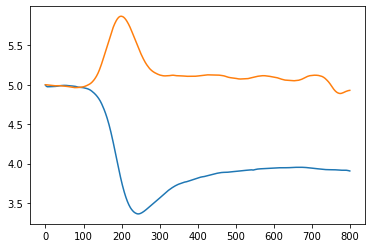

In [3]:
data = 'm1'

total = {}
for name in ('A800', 'norho'):
    BEGIN = 30
    NUM = 35

    ts = yt.load(f"~/uni/astro/archive/output2_{name}/*.dat")
    total[name] = None
    for ds in ts[BEGIN:BEGIN+NUM]:
        all_data_level_0 = ds.covering_grid(level=0, left_edge=[0,0.0,0.0], dims=ds.domain_dimensions)

        squeezed = np.squeeze(all_data_level_0[data])
        profile = squeezed[:,squeezed.shape[1]//2]
        if total[name] is None:
            total[name] = profile
        else:
            total[name] += profile

    total[name] /= len(ts[BEGIN:BEGIN+NUM])
    plt.plot(total[name])

plt.show()


## Plot slices along the various axes

average along y axis:
[5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         

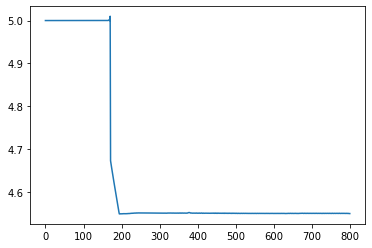

---
skewness along y axis:
[ 1.89175293e-45 -1.07899982e-45 -4.55422001e-47 -3.85006753e-45
  7.63532501e-45 -2.91645243e-45  8.37275832e-46  6.25679764e-45
  7.70889318e-45  6.57559304e-45  1.05482742e-44  2.72797779e-44
  1.63461466e-44  3.89490908e-44  2.18655109e-44 -7.58627956e-45
  6.45473105e-45 -1.52373692e-44  3.77755034e-44  1.03641786e-43
  7.74497661e-44  9.93047673e-44  1.06638813e-44  3.56753073e-44
  1.65528381e-45  3.35085495e-44  1.62571641e-43  2.14799787e-43
  1.27427076e-43 -4.38361192e-44  1.30220915e-43  9.68717628e-44
  1.49541317e-43  9.97321633e-44  1.10891754e-43  1.69560617e-43
  9.78316523e-44  1.83526308e-43  3.29704509e-43  4.07558900e-43
  2.91951777e-43  2.95980510e-43  2.96134653e-43  2.07357140e-43
  1.10022949e-43  2.04869835e-43  3.10774719e-43  3.52037703e-43
  3.57495761e-43  2.25446152e-43  2.86190689e-43  4.49678429e-43
  5.60559673e-43  4.20925536e-43  4.14067932e-43  3.68462673e-43
  2.17409705e-43  3.80671486e-43  5.09433299e-43  3.69809671e-4

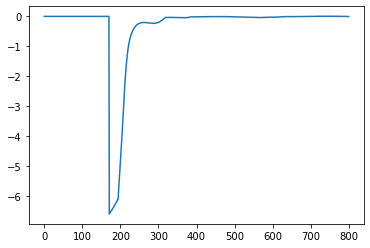

---



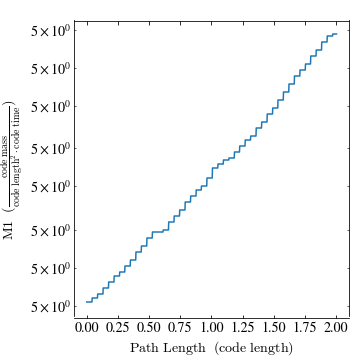

In [10]:
all_data_level_0 = ds.covering_grid(level=0, left_edge=[0,0.0,0.0],dims=ds.domain_dimensions)

print('average along y axis:')

print(np.average(np.squeeze(all_data_level_0['m1']), axis=1))
plt.plot(np.average(np.squeeze(all_data_level_0['m1']), axis=1))
plt.show()
print('---')


print('skewness along y axis:')
print(moment(np.squeeze(all_data_level_0['m1']), axis=1, moment=3))
plt.plot(moment(np.squeeze(all_data_level_0['m1']), axis=1, moment=3))
plt.show()
print('---')


p = yt.LinePlot(ds, ['m1'], (0, 0.5, 0), (2, 0.5, 0), 1000)
p.show()

In [18]:
p = yt.SlicePlot(ds, 'y', 'm1')
p.show()

yt : [INFO     ] 2020-11-29 15:14:41,513 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-11-29 15:14:41,514 ylim = 0.000000 35.000000
yt : [INFO     ] 2020-11-29 15:14:41,515 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-11-29 15:14:41,517 ylim = 0.000000 35.000000
yt : [INFO     ] 2020-11-29 15:14:41,519 Making a fixed resolution buffer of (('amrvac', 'm1')) 800 by 800


KeyboardInterrupt: 

yt : [INFO     ] 2020-11-29 14:58:53,477 xlim = 0.000000 35.000000
yt : [INFO     ] 2020-11-29 14:58:53,478 ylim = 0.000000 30.000000
yt : [INFO     ] 2020-11-29 14:58:53,479 xlim = 0.000000 35.000000
yt : [INFO     ] 2020-11-29 14:58:53,479 ylim = 0.000000 30.000000
yt : [INFO     ] 2020-11-29 14:58:53,481 Making a fixed resolution buffer of (('amrvac', 'm1')) 800 by 800
yt : [WARNING  ] 2020-11-29 14:58:54,282 Plot image for field ('amrvac', 'm1') has both positive and negative values. Min = -0.915418, Max = 5.154242.
yt : [WARNING  ] 2020-11-29 14:58:54,283 Switching to symlog colorbar scaling unless linear scaling is specified later
C:\Users\semvi\anaconda3\lib\site-packages\yt\visualization\base_plot_types.py:220: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(



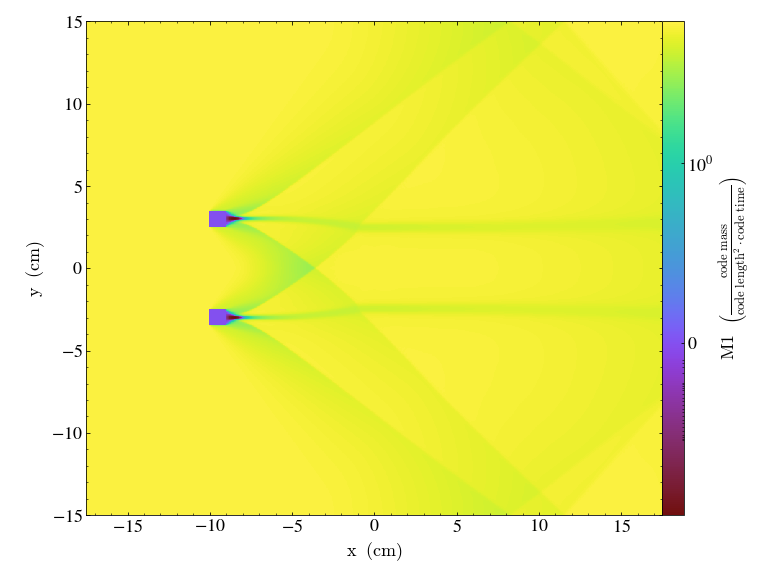

In [13]:
p = yt.SlicePlot(ds, 'z', 'm1')
p.show()

## Energy spectrum of Y at X = 26

TODO
* also use m2?
* average/filter data
* plot dashed lines

In [2]:
ts = yt.load("output/*.dat")
data = 'm1'
U_in = 5
dt = 0.75
X, X_max = 26, 35
X_index = int( 800 * X / X_max)

r = range(400)
d = []
for I in r:
    ds = ts[I]
    sl = np.average(np.squeeze(ds.covering_grid(level=0, left_edge=[0,0.0,0.0], dims=ds.domain_dimensions)[data])[X_index,400:401],axis=0)
    d.append(sl)

fourier = np.fft.fft(d)
for i in range(len(fourier)): fourier[i] *= i
e = np.square(np.absolute(fourier))
f = np.linspace(0.2, e.size/U_in, e.size) # scale x-axis values
plt.loglog(f[1:f.size//2],e[1:f.size//2])
plt.loglog([i / 100 for i in range(100,1100)], [(i/100) ** (-5/3) for i in range(100,1100)])
plt.ylim(1e-8, 1e8)
plt.show()


yt : [INFO     ] 2020-12-02 10:13:49,971 Parameters: current_time              = 63.63999622371359
yt : [INFO     ] 2020-12-02 10:13:49,972 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:13:49,972 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:13:49,973 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:13:49,973 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:13:50,345 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:13:51,166 Parameters: current_time              = 63.65
yt : [INFO     ] 2020-12-02 10:13:51,166 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:13:51,167 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:13:51,167 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:13:51,168 Parameters: cosmolog

IndexError: list index out of range

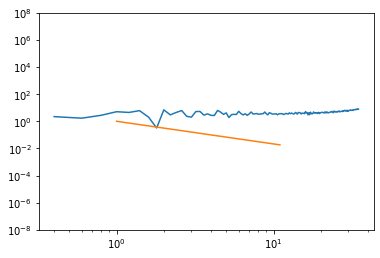

In [13]:
fourier = np.fft.fft(d)
for i in range(len(fourier)): fourier[i] *= i
e = np.square(np.absolute(fourier))
f = np.linspace(0.2, e.size/U_in, e.size) # scale x-axis values
plt.loglog(f[1:f.size//2],e[1:f.size//2])
plt.loglog([i / 100 for i in range(100,1100)], [(i/100) ** (-5/3) for i in range(100,1100)])
plt.ylim(1e-8, 1e8)
plt.show()

## Covergence test for grid sizes 50..800

No data available yet, so I haven't been able to completely test this code, but I think it should work :)

yt : [INFO     ] 2020-12-01 14:43:57,722 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-12-01 14:43:57,723 Parameters: domain_dimensions         = [50 50  1]
yt : [INFO     ] 2020-12-01 14:43:57,724 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:43:57,724 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:43:57,725 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2020-12-01 14:43:57,746 Parameters: current_time              = 30.0
yt : [INFO     ] 2020-12-01 14:43:57,746 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-01 14:43:57,747 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:43:57,747 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:43:57,748 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-01 14:43:58,116 e not found and no parfile passed, can not set thermal_pressu

[[0.13775301 0.16174584 0.01597895 0.00367983]
 [0.12640982 0.15540144 0.03945629 0.01815339]
 [0.13910833 0.16287518 0.01964113 0.01344411]
 [0.12860114 0.15967936 0.04463727 0.05943891]
 [0.1370077  0.1610591  0.01395294 0.01278552]
 [0.12920951 0.15657234 0.01633463 0.03415093]
 [0.1353816  0.15963565 0.00970191 0.03409388]
 [0.13419333 0.1587856  0.00701143 0.01018438]
 [0.13508533 0.15870253 0.00712035 0.02805099]
 [0.13615175 0.16021241 0.01160868 0.01050464]
 [0.13287768 0.15661256 0.00278075 0.01140729]
 [0.13574282 0.15970308 0.01006624 0.01138177]
 [0.1316662  0.15625023 0.00512493 0.02052258]
 [0.13518414 0.15938184 0.00925645 0.02390375]
 [0.13157757 0.15672834 0.00598492 0.01118394]
 [0.13520613 0.15922036 0.00887581 0.00705755]
 [0.13487699 0.15829582 0.00749168 0.00941348]
 [0.13498658 0.15894783 0.00783284 0.00165664]
 [0.13449507 0.15836321 0.00618082 0.00976708]
 [0.13417693 0.15827555 0.00558598 0.00886711]
 [0.13352588 0.15776136 0.00422128 0.00516333]
 [0.1341882  

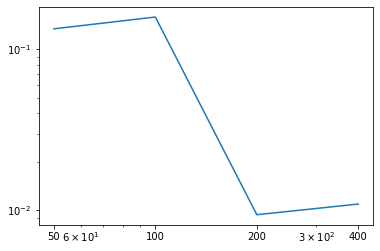

In [21]:
ts = {}
# dims = np.array([200,400,800])
dims = np.array([50,100,200,400,800])
for dim in dims:
    ts[dim] = yt.load(f'~/uni/astro/archive/output2_A{dim if dim > 99 else f"0{dim}"}/*.dat')

start = 40     # first timeframe to check
step = 1      # step between timeframes
data = 'm1'
nb_time_checks = 40
err_approx = np.empty((nb_time_checks,dims.size-1))

# use domain dimensions of the smallest grid, to easily compare the grids
dom_dims = ts[dims[0]][0].domain_dimensions

for i in range(nb_time_checks):
    time = start+step*i
    
    # use grid with highest resolution as a reference
    ds = ts[dims[-1]][time]
    ref = np.squeeze(ds.covering_grid(level=0, left_edge=[0,0.0,0.0], dims=dom_dims)[data])
    ref_norm = np.linalg.norm(ref)
    
    for j in range(dims.size-1):
        ds = ts[dims[j]][time]
        test = np.squeeze(ds.covering_grid(level=0, left_edge=[0,0.0,0.0], dims=dom_dims)[data])
        err_approx[i,j] = np.linalg.norm(test-ref) / ref_norm
        
print(err_approx)   

# plot average error over different times, in function of domain size
plt.loglog(dims[0:dims.size-1],np.average(err_approx,0))
plt.xticks(dims[0:dims.size-1], dims[0:dims.size-1])
plt.show()